Shreyas Panzade
22102B2002 - TE CMPN B
#####Experiment 4
Github - https://github.com/shreyaspanzade2002/ML-Lab---VIT
Classification Dataset

Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809524
AUC: 0.9952505732066819


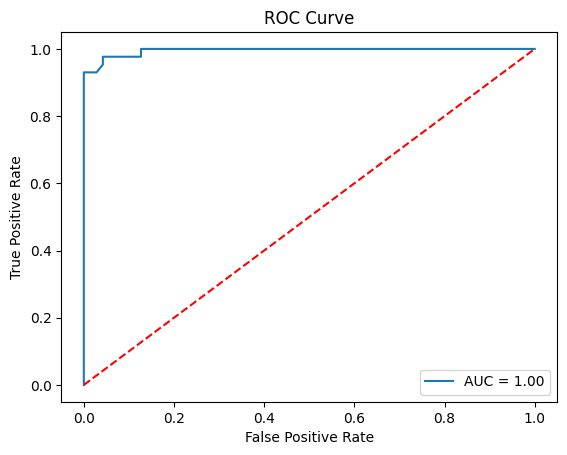

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define column names based on the dataset description (including mean, SE, and worst for each feature)
feature_names = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity',
                 'concave_points', 'symmetry', 'fractal_dimension']

# Creating column names for mean, se, and worst measurements
column_names = ['id', 'diagnosis'] + [f"{f}_{m}" for f in feature_names for m in ['mean', 'se', 'worst']]

# Load the dataset
data = pd.read_csv('wdbc.data', header=None, names=column_names)

# Convert 'M' (malignant) to 1 and 'B' (benign) to 0 in the 'diagnosis' column
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Drop the 'id' column as it is not required for the analysis
data.drop('id', axis=1, inplace=True)

# Split the data into features and target variable
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predictions
predictions = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc_score = roc_auc_score(y_test, probabilities)

# Printing evaluation metrics
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nAUC: {auc_score}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.figure()
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Regression Dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
# Load the dataset
housing_data = pd.read_csv('housing.csv')

# Data cleaning
housing_data.dropna(inplace=True)
housing_data.drop_duplicates(inplace=True)

# Convert categorical features to numerical using one-hot encoding
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

# Features and target
X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predictions
predictions = regressor.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}\nR^2 Score: {r2}")

Mean Squared Error: 2376056231.2846966
R^2 Score: 0.8262504702161796
